#**Classifying Fruits and Vegetables Using Image Classification**


The given dataset contains images of a variety of fruits and vegetables, offering a rich source for
developing and testing image recognition algorithms.


The food items are categorized as follows:
Fruits:
Banana, Apple, Pear, Grapes, Orange, Kiwi, Watermelon, Pomegranate, Pineapple, Mango


Vegetables:
Cucumber, Carrot, Capsicum, Onion, Potato, Lemon, Tomato, Radish, Beetroot, Cabbage, Lettuce, Spinach, Soybean, Cauliflower, Bell Pepper, Chilly, Pepper, Turnip, Corn, Sweetcorn, Sweet Potato, Paprika, Jalapeño, Ginger, Garlic, Peas, Eggplant


Given this dataset, your task is to create a machine learning model that can classify the images into two main categories: Fruits and Vegetables.

**Importing necessary libraries**

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

**Load and Prepare the dataset**

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-and-vegetable-image-recognition


**Load the dataset with all classses**

In [55]:
import os
IMG_SIZE = (32,32)
BATCH_SIZE = 64

dataset_path = "/kaggle/input/fruit-and-vegetable-image-recognition"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "validation")
test_path = os.path.join(dataset_path, "test")

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'  # load integer labels
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

class_names = train_ds.class_names
print("Classes found:", class_names)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.
Found 359 files belonging to 36 classes.
Classes found: ['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage', 'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn', 'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno', 'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika', 'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish', 'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato', 'turnip', 'watermelon']


**Convert Multi-Class Labels to Binary Labels**

In [56]:
#Define fruit classes
fruit_classes = {'banana', 'apple', 'pear', 'grapes', 'orange', 'kiwi',
                 'watermelon', 'pomegranate', 'pineapple', 'mango'}

# Map class index to binary (0 = fruit, 1 = vegetable)
class_to_binary = {i: 0 if name.lower() in fruit_classes else 1 for i, name in enumerate(class_names)}

#Create binary label list
binary_label_list = [class_to_binary[i] for i in range(len(class_to_binary))]

# Mapping function
def map_label_to_binary(image, label):
    binary_label = tf.gather(binary_label_list, label)
    return image, binary_label

**Normalization and Prefetching**

In [57]:
train_ds = train_ds.map(map_label_to_binary)
val_ds = val_ds.map(map_label_to_binary)
test_ds = test_ds.map(map_label_to_binary)

# Normalize(normalizes the image pixel values from the original [0, 255] range to [0, 1])
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))
test_ds = test_ds.map(lambda x, y: (x / 255.0, y))

# Prefetch
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

**Build the CNN model**

In [58]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model**

In [59]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

**Train the model**

In [60]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.6885 - loss: 0.6048 - val_accuracy: 0.7236 - val_loss: 0.5705
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.7309 - loss: 0.5636 - val_accuracy: 0.7236 - val_loss: 0.5263
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7323 - loss: 0.5398 - val_accuracy: 0.7892 - val_loss: 0.4904
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7535 - loss: 0.5138 - val_accuracy: 0.8063 - val_loss: 0.4776
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.7550 - loss: 0.5040 - val_accuracy: 0.8120 - val_loss: 0.4424
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7629 - loss: 0.4827 - val_accuracy: 0.8177 - val_loss: 0.4071
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.7663 - loss: 0.4694 - val_accuracy: 0.8148 - val_loss: 0.3653
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7905 - loss: 0.4273 - val_accuracy: 0.8689 - val_loss:

**Evaluate the Model on Test Data**

In [61]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.2f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9094 - loss: 0.2773
Test Accuracy: 0.91


**Visualize Training and Validation Accuracy & Loss**

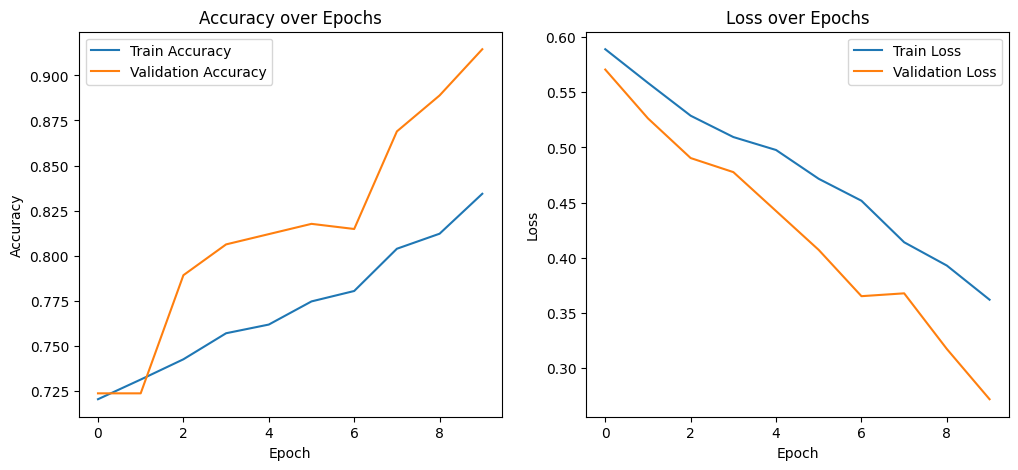

In [62]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()

**Prediction**

**Prediction result:Fruit**

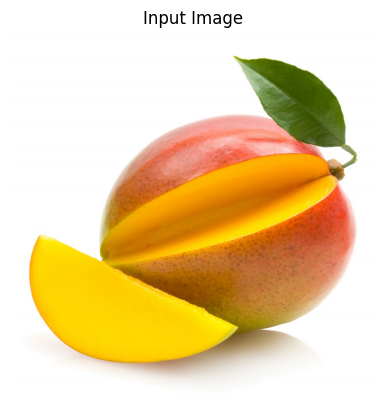

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: Fruit


In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

def display_and_predict(model, img_path, img_size=(32, 32)):
    # Load and display original image
    original_img = Image.open(img_path)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Resize for model prediction
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    predicted_class = "Fruit" if prediction < 0.5 else "Vegetable"

    print(f"Prediction: {predicted_class}")


#Example test image path
img_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test/mango/Image_7.jpg"
display_and_predict(model, img_path)


**Prediction result:Vegetable**

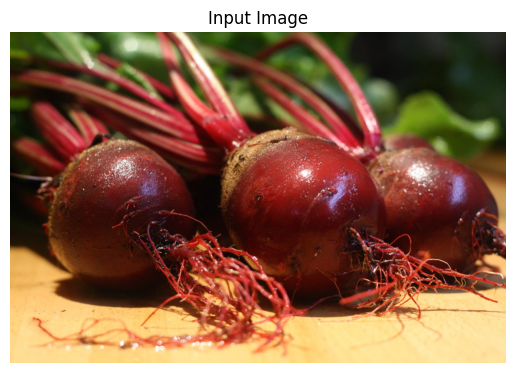

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Vegetable


In [74]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image

def display_and_predict(model, img_path, img_size=(32, 32)):
    # Load and display original image
    original_img = Image.open(img_path)
    plt.imshow(original_img)
    plt.axis('off')
    plt.title("Input Image")
    plt.show()

    # Resize for model prediction
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict
    prediction = model.predict(img_array)[0][0]
    predicted_class = "Fruit" if prediction < 0.5 else "Vegetable"

    print(f"Prediction: {predicted_class}")


#Example test image path:
img_path = "/kaggle/input/fruit-and-vegetable-image-recognition/test/beetroot/Image_4.jpg"
display_and_predict(model, img_path)
